## Observations and Insights 

In [ ]:
# Observations & Inferences

# 1. The scatter plot generated shows a positive correlation when comparing average tumor volume and weight. 
# 2. The gender distribution of mice is nearly equal with males at 50.2% and females at 49.8%.
# 3. The box plot shows that Infubinol has a possible outlier below it's lower bound range. 

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy import stats


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_results_merge = pd.merge(left=study_results,right=mouse_metadata,on="Mouse ID",how="left")
study_results_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [64]:
# Checking the number of mice in the DataFrame.
study_results_merge["Mouse ID"].value_counts()

g989    13
c757    10
r701    10
g288    10
a203    10
        ..
n482     1
v199     1
x336     1
x226     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [67]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_df = study_results_merge.drop_duplicates(["Mouse ID","Timepoint"])
unique_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [68]:
# Checking the number of mice in the clean DataFrame.
unique_df["Mouse ID"].value_counts()

c757    10
e584    10
a203    10
z578    10
g791    10
        ..
l872     1
d133     1
h428     1
o848     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df = unique_df.groupby(["Drug Regimen"])
regimen_df_mean = regimen_df["Tumor Volume (mm3)"].mean()
regimen_df_median = regimen_df["Tumor Volume (mm3)"].median()
regimen_df_variance = regimen_df["Tumor Volume (mm3)"].var()
regimen_df_std = regimen_df["Tumor Volume (mm3)"].std()
regimen_df_sem = regimen_df["Tumor Volume (mm3)"].sem()

regimen_stats = ({"Mean":regimen_df_mean,"Median":regimen_df_median,"Variance":regimen_df_variance,"Standard Deviation":regimen_df_std,"SEM":regimen_df_sem})
regimen_stats_df = pd.DataFrame(regimen_stats)
regimen_stats_df

# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df = unique_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
regimen_df


# This method produces everything in a single groupby function.

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

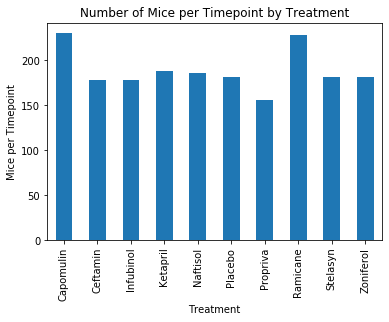

In [71]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
pandas_mice_treatment = unique_df.groupby(["Drug Regimen"])["Mouse ID"].count()

count_bar_chart = pandas_mice_treatment.plot(kind="bar")
count_bar_chart.set_xlabel("Treatment")
count_bar_chart.set_ylabel("Mice per Timepoint")
plt.title("Number of Mice per Timepoint by Treatment")
plt.show()



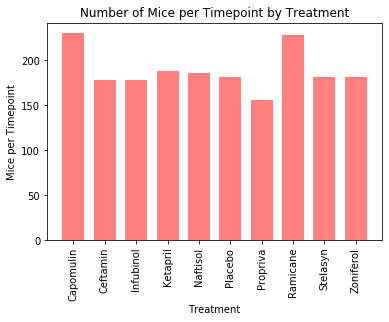

In [72]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
matplot_mice_treatment = unique_df.groupby(["Drug Regimen"])["Mouse ID"].count()
treatment = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]

x_axis = np.arange(len(treatment))
plt.bar(x_axis, matplot_mice_treatment, color='r', alpha=0.5, align="center",width=0.7)
plt.xticks(x_axis, treatment,rotation=90)
plt.xlabel("Treatment")
plt.ylabel("Mice per Timepoint")
plt.title("Number of Mice per Timepoint by Treatment")
plt.tight_layout
plt.show()



## Pie Plots

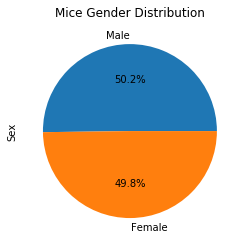

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pandas_genders = mouse_metadata["Sex"].value_counts()
pandas_genders.plot(kind="pie",autopct="%1.1f%%",startangle=0)
plt.title("Mice Gender Distribution")
plt.show()



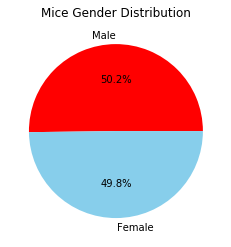

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pyplt_genders = mouse_metadata["Sex"].value_counts()
plt.pie(pyplt_genders, labels=["Male", "Female"], colors=["red", "skyblue"], autopct="%1.1f%%", startangle=0)
plt.title("Mice Gender Distribution")

plt.show()

## Quartiles, Outliers and Boxplots

In [85]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. 
capomulin_df = unique_df.loc[unique_df["Drug Regimen"]=="Capomulin"]
ramicane_df = unique_df.loc[unique_df["Drug Regimen"]=="Ramicane"]
infubinol_df = unique_df.loc[unique_df["Drug Regimen"]=="Infubinol"]
ceftamin_df = unique_df.loc[unique_df["Drug Regimen"]=="Ceftamin"]

capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [89]:
# Calculate final tumor volume for Capomulin
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_last_volume_df = pd.DataFrame(capomulin_last)
capomulin_merge_df = pd.merge(capomulin_last_volume_df, unique_df, on=("Mouse ID","Timepoint"),how="left")
capomulin_merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [81]:
# Calculate final tumor volume for Ramicane
ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_last_volume_df = pd.DataFrame(ramicane_last)
ramicane_merge_df = pd.merge(ramicane_last_volume_df, unique_df, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [82]:
# Calculate final tumor volume for Infubinol
infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_last_volume_df = pd.DataFrame(infubinol_last)
infubinol_merge_df = pd.merge(infubinol_last_volume_df, unique_df, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [83]:
# Calculate final tumor volume for Ceftamin
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_last_volume_df = pd.DataFrame(ceftamin_last)
ceftamin_merge_df = pd.merge(ceftamin_last_volume_df, unique_df, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [94]:
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

# Capomulin Quartiles & IQR

cap_tumors = capomulin_merge_df["Tumor Volume (mm3)"]

cap_quartiles = cap_tumors.quantile(q=[.25,.5,.75])

cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq - cap_lowerq

cap_lower_bound = cap_lowerq - (1.5 * cap_iqr)
cap_upper_bound = cap_upperq + (1.5 * cap_iqr)

print(f"The IQR for Capomulin is {cap_iqr}.")
print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")

The IQR for Capomulin is 7.781863460000004.
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [95]:
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

# Ramicane Quartiles & IQR

ram_tumors = ramicane_merge_df["Tumor Volume (mm3)"]

ram_quartiles = ram_tumors.quantile(q=[.25,.5,.75])

ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq - ram_lowerq

ram_lower_bound = ram_lowerq - (1.5 * ram_iqr)
ram_upper_bound = ram_upperq + (1.5 * ram_iqr)

print(f"The IQR for Ramicane is {ram_iqr}.")
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")

The IQR for Ramicane is 9.098536719999998.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [96]:
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

# Infubinol Quartiles & IQR

inf_tumors = infubinol_merge_df["Tumor Volume (mm3)"]

inf_quartiles = inf_tumors.quantile(q=[.25,.5,.75])

inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq - inf_lowerq

inf_lower_bound = inf_lowerq - (1.5 * inf_iqr)
inf_upper_bound = inf_upperq + (1.5 * inf_iqr)

print(f"The IQR for Infubinol is {inf_iqr}.")
print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")

The IQR for Infubinol is 11.477135160000003.
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [97]:
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

# Ceftamin Quartiles & IQR

cef_tumors = ceftamin_merge_df["Tumor Volume (mm3)"]

cef_quartiles = cef_tumors.quantile(q=[.25,.5,.75])

cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq - cef_lowerq

cef_lower_bound = cef_lowerq - (1.5 * cef_iqr)
cef_upper_bound = cef_upperq + (1.5 * cef_iqr)

print(f"The IQR for Ceftamin is {cef_iqr}.")
print(f"Values below {cef_lower_bound} could be outliers.")
print(f"Values above {cef_upper_bound} could be outliers.")

The IQR for Ceftamin is 15.577752179999997.
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


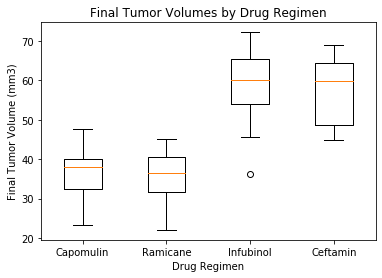

In [112]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

all_tumors = [cap_tumors, ram_tumors, inf_tumors, cef_tumors]

fig, ax = plt.subplots()
ax.boxplot(all_tumors, labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Volumes by Drug Regimen")

plt.show()

## Line and Scatter Plots

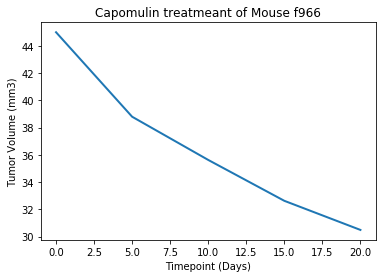

In [49]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "f966",:]

line_x_axis = line_df["Timepoint"]
tumor_vol = line_df["Tumor Volume (mm3)"]

plt.title("Capomulin treatmeant of Mouse f966")
plt.plot(line_x_axis, tumor_vol,linewidth=2, markersize=12)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.savefig("linechart")
plt.show()

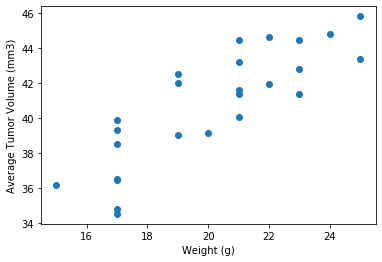

In [50]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_average = capomulin_df.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_average["Weight (g)"],capomulin_average["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()


## Correlation and Regression

In [55]:
# Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. 
weight = capomulin_average["Weight (g)"]
average_volume = capomulin_average["Tumor Volume (mm3)"]
correlation = stats.pearsonr(weight,average_volume)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}"


The correlation between mouse weight and average tumor volume is 0.84


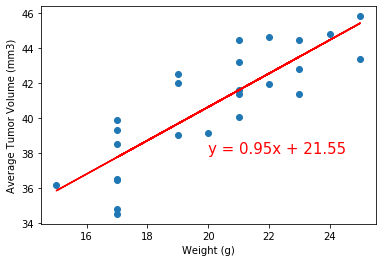

In [58]:
# Plot the linear regression model on top of the previous scatter plot.


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weight, average_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capomulin_average["Weight (g)"],capomulin_average["Tumor Volume (mm3)"])
plt.plot(weight,regress_values,color="red")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()